In [8]:
# Data processing 
import numpy as np
import pandas as pd

# Data visualisation
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',  labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Models
import sklearn

# Commons
import os
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [9]:
dataset = pd.read_csv('../input/wine/wine.csv')

In [10]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [11]:
dataset.shape

(1143, 13)

In [12]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [13]:
dataset.drop(columns=['Id'], inplace=True)

In [14]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


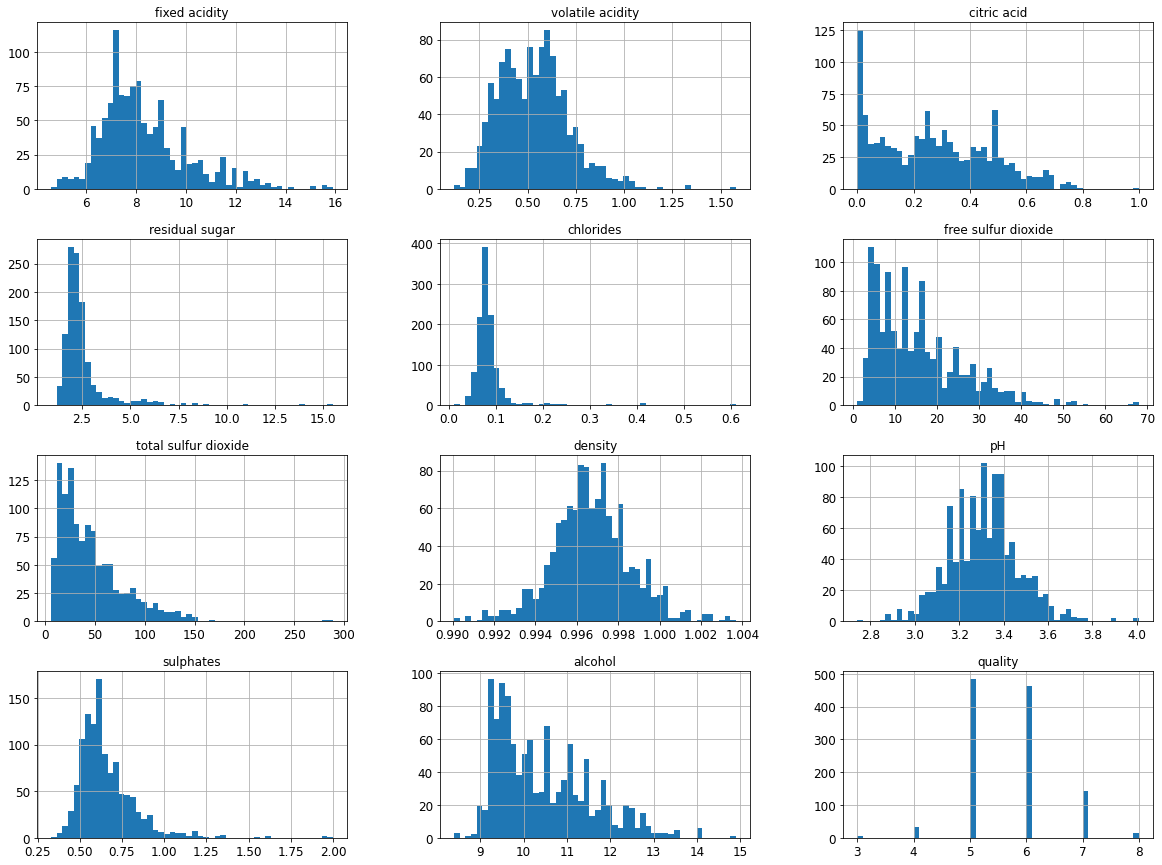

In [15]:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [16]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [18]:
corr_mat = dataset.corr()
corr_mat['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

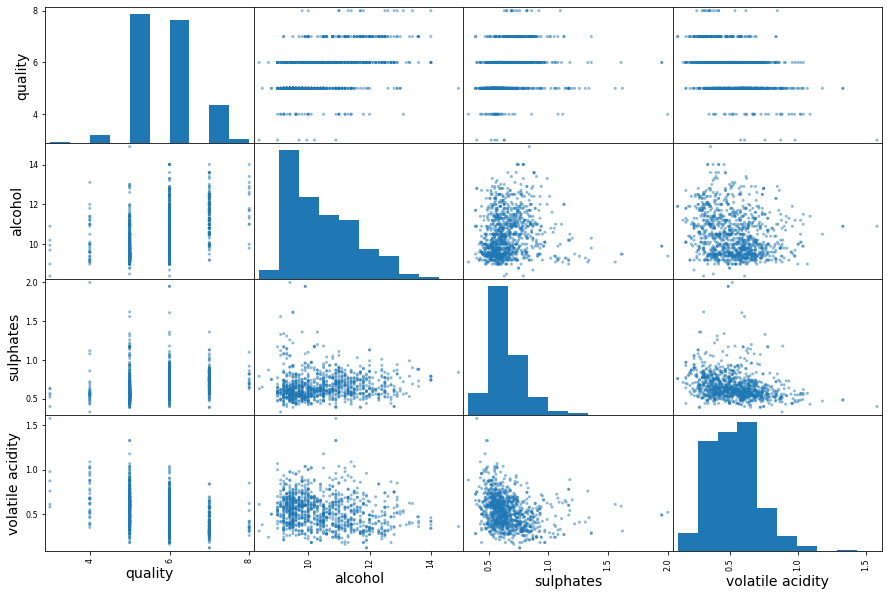

In [19]:
from pandas.plotting import scatter_matrix

attrs = ['quality', 'alcohol', 'sulphates', 'volatile acidity']
scatter_matrix(dataset[attrs], figsize=(15, 10))
plt.show()

In [20]:
# labels = dataset['quality']
# dataset.drop(columns=['quality'], inplace=True)

In [21]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
# Let's split the dataset by `labels`
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_STATE)
for train_idx, test_idx in split.split(dataset, dataset['quality']):
    train_set = dataset.loc[train_idx]
    test_set  = dataset.loc[test_idx]

In [23]:
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
819,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5
357,10.5,0.24,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8,7
385,9.5,0.46,0.49,6.3,0.064,5.0,17.0,0.99880,3.21,0.73,11.0,6
1057,5.6,0.62,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,4
161,8.9,0.59,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6


In [24]:
train_set.shape

(914, 12)

In [25]:
train_set['quality'].value_counts() / len(train_set)

5    0.422319
6    0.404814
7    0.124726
4    0.028446
8    0.014223
3    0.005470
Name: quality, dtype: float64

In [26]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
96,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
442,8.8,0.60,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5
872,7.6,0.43,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5
764,6.8,0.48,0.08,1.8,0.074,40.0,64.0,0.99529,3.12,0.49,9.6,5
570,7.7,0.60,0.00,2.6,0.055,7.0,13.0,0.99639,3.38,0.56,10.8,5


In [27]:
test_set.shape

(229, 12)

In [28]:
test_set['quality'].value_counts() / len(test_set)

5    0.423581
6    0.401747
7    0.126638
4    0.030568
8    0.013100
3    0.004367
Name: quality, dtype: float64

In [29]:
# We can see that the proportions are roughly the same, which is good

In [30]:
# Let's drop the labels from `train_set` and `test_set`

In [31]:
y_train = train_set['quality']
train_set.drop('quality', axis=1, inplace=True)

In [32]:
y_test = test_set['quality']
test_set.drop('quality', axis=1, inplace=True)

In [33]:
# Convert from pd series to array
y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)

In [34]:
# Until now, we have (train_set, y_train), (test_set, y_test)

In [35]:
attrs = []
for attr in train_set.columns:
    attrs.append(attr)

In [36]:
# The dataset doesn't have any missing values
# Contains only numerical values, so we don't need separate pipelines

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

pipe = Pipeline([
    ('normalizer', Normalizer()),
])

transformer = ColumnTransformer([
    ('num', pipe, attrs),
])

In [37]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('normalizer', Normalizer())]),
                                 ['fixed acidity', 'volatile acidity',
                                  'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'total sulfur dioxide',
                                  'density', 'pH', 'sulphates', 'alcohol'])])

In [38]:
X_train = transformer.fit_transform(train_set[attrs])

In [39]:
X_train.shape

(914, 11)

In [40]:
X_train[0]

array([0.20092658, 0.01452481, 0.00605201, 0.05325765, 0.00285655,
       0.2178722 , 0.91990483, 0.02411506, 0.07625527, 0.01283025,
       0.23723861])

In [41]:
X_test = transformer.transform(test_set[attrs])

In [42]:
X_test.shape

(229, 11)

In [43]:
# Until now, we have (X_train, y_train) and (X_test, y_test)

In [44]:
# Let's try a base model to see the first results
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred)
tree_acc

0.5414847161572053

In [46]:
(unique, counts) = np.unique(y_train, return_counts=True)
freq = np.asarray((unique, counts)).T
freq

array([[  3,   5],
       [  4,  26],
       [  5, 386],
       [  6, 370],
       [  7, 114],
       [  8,  13]], dtype=int64)

In [47]:
# We can see that the minority classes have very few instances
# This leads to poor predictions

# We need to find a way to augmentate the minority instances

In [48]:
# Let's use the SMOTE class to perform oversampling

In [49]:
!pip3.8 install imbalanced-learn

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=4, random_state=RANDOM_STATE)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [53]:
X_train.shape

(914, 11)

In [55]:
y_train.shape

(914,)

In [54]:
X_train_res.shape

(2316, 11)

In [56]:
y_train_res.shape

(2316,)

In [57]:
(unique, counts) = np.unique(y_train_res, return_counts=True)
freq = np.asarray((unique, counts)).T
freq

array([[  3, 386],
       [  4, 386],
       [  5, 386],
       [  6, 386],
       [  7, 386],
       [  8, 386]], dtype=int64)

In [58]:
# Now, we have an equal number of instances in each class
# Let's try again a base `tree_clf`

tree_clf.fit(X_train_res, y_train_res)
y_pred = tree_clf.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred)
tree_acc

0.537117903930131

In [61]:
# Another way to see how many instances we have in each class
y_train_res_df = pd.DataFrame(y_train_res)
y_train_res_df.value_counts()

3    386
4    386
5    386
6    386
7    386
8    386
dtype: int64

In [66]:
# We don't see any improvement yet
# Let's try a RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=RANDOM_STATE)

In [67]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred = rnd_clf.predict(X_test)
rnd_acc = accuracy_score(y_test, y_pred)
rnd_acc

0.6462882096069869

In [69]:
rnd_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [70]:
y_pred = rnd_clf.predict(X_test)
rnd_acc = accuracy_score(y_test, y_pred)
rnd_acc

0.5851528384279476

In [72]:
# As we can see, there is no improvement with the oversampling technique
# Because the model is expecting to receive a balanced test set, which is not the case

In [73]:
# So, let's use the (X_train, y_train), (X_test, y_test) sets

In [77]:
# We can try to do a TSNE for dataviz
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=10000, random_state=RANDOM_STATE)

In [78]:
X_train_red = tsne.fit_transform(X_train)

F:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
F:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [79]:
X_train_red.shape

(914, 2)

In [80]:
def plot_clusters(X, y):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="jet")
    plt.axis('off')
    plt.colorbar()

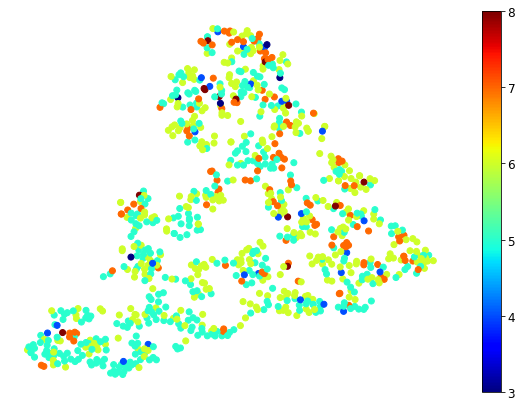

In [83]:
plot_clusters(X_train_red, y_train)

In [84]:
# There are not obvious clusters
# Let's try an unsupervised algorithm such as KMeans
# Maybe it will result in a better cluster visualisation

In [100]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE)
clusters = kmeans.fit_predict(X_train)

In [101]:
# Let's combine KMeans with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_red = pd.DataFrame(pca.fit_transform(X_train), columns=['PC1', 'PC2'])
X_red

,PC1,PC2
0,-0.083969,-0.102137
1,0.181252,-0.101486
2,0.309203,-0.099226
3,0.298452,0.031718
4,-0.242279,0.001005
...,...,...
909,-0.264707,0.030708
910,0.341681,-0.092028
911,-0.043156,0.069492
912,-0.150971,-0.047376


In [104]:
X_train.shape


(914, 11)

In [105]:
X_red['cluster'] = clusters
X_red

,PC1,PC2,cluster
0,-0.083969,-0.102137,4
1,0.181252,-0.101486,3
2,0.309203,-0.099226,3
3,0.298452,0.031718,3
4,-0.242279,0.001005,0
...,...,...,...
909,-0.264707,0.030708,0
910,0.341681,-0.092028,3
911,-0.043156,0.069492,2
912,-0.150971,-0.047376,4


In [107]:
# Only `transform` (we fitted the pca model previously)
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[-0.2501191 , -0.09662847],
       [ 0.07940252,  0.1078521 ],
       [-0.13628127,  0.14003922],
       [ 0.26419742, -0.04661801],
       [-0.05188364, -0.06818807],
       [ 0.48575431, -0.03351716]])

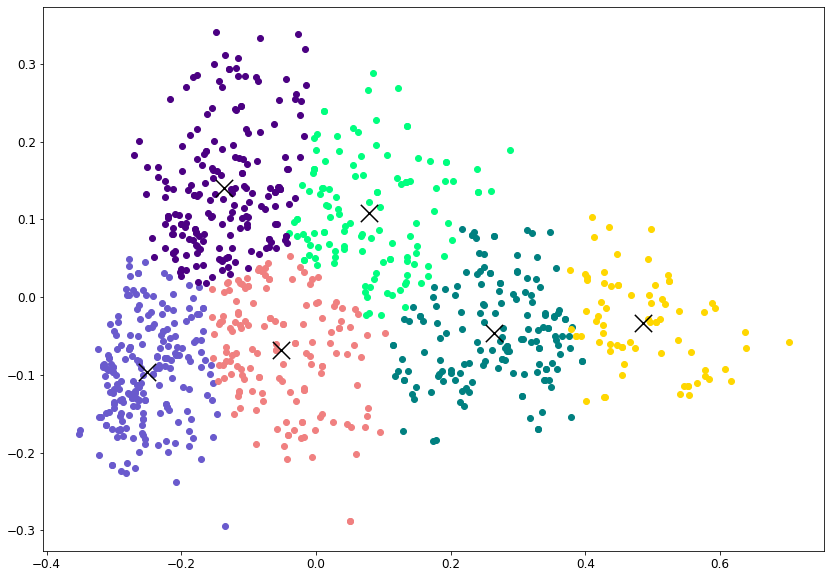

In [108]:
plt.figure(figsize=(14, 10))

plt.scatter(X_red[X_red['cluster'] == 0].loc[:, 'PC1'], X_red[X_red['cluster'] == 0].loc[:, 'PC2'], color='slateblue')
plt.scatter(X_red[X_red['cluster'] == 1].loc[:, 'PC1'], X_red[X_red['cluster'] == 1].loc[:, 'PC2'], color='springgreen')
plt.scatter(X_red[X_red['cluster'] == 2].loc[:, 'PC1'], X_red[X_red['cluster'] == 2].loc[:, 'PC2'], color='indigo')
plt.scatter(X_red[X_red['cluster'] == 3].loc[:, 'PC1'], X_red[X_red['cluster'] == 3].loc[:, 'PC2'], color='teal')
plt.scatter(X_red[X_red['cluster'] == 4].loc[:, 'PC1'], X_red[X_red['cluster'] == 4].loc[:, 'PC2'], color='lightcoral')
plt.scatter(X_red[X_red['cluster'] == 5].loc[:, 'PC1'], X_red[X_red['cluster'] == 5].loc[:, 'PC2'], color='gold')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.show()

In [114]:
# As we can see, KMeans finds some interesting clusters
# But this doesn't mean that they are the correct ones

In [117]:
# Anyway, we can continue with the (X_train, y_train), (X_test, y_test) sets

In [118]:
# Let's go ahead and try different base models:
# -> LinearSVC
# -> KNeighborsClassifier
# -> Kernelized SVM
# -> RandomForest
# Then we can combine them into:
# -> EnsembleClassifiers
# Last, use a grid search on the entire ensemble

In [126]:
# `LinearSVC`
from sklearn.svm import SVC

lin_svc = SVC(kernel='linear', probability=True)
lin_svc.fit(X_train, y_train) 

SVC(kernel='linear', probability=True)

In [127]:
y_pred = lin_svc.predict(X_test)
lin_svc_acc = accuracy_score(y_test, y_pred)
lin_svc_acc

0.5633187772925764

In [128]:
# `KNeighborsClassifier`
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [129]:
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.5109170305676856

In [136]:
# `Kernelized SVM`

from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [137]:
y_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
svm_acc

0.5676855895196506

In [130]:
# `RandomForest`
from sklearn.ensemble import RandomForestClassifier

rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
y_pred = rnd_forest.predict(X_test)
rnd_forest_acc = accuracy_score(y_test, y_pred)
rnd_forest_acc

0.62882096069869

In [134]:
# Until now, the `RandomForest` have the best accuracy
# The dataset doesn't have very correlated features and the model can't generalize well

In [144]:
# Let's try an ensemble (`VotingClassifier`)
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([
    ('rnd_forest', rnd_forest),
    ('svc', svm),
], voting='soft')
voting

VotingClassifier(estimators=[('rnd_forest', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [145]:
def get_acc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [151]:
voting_acc = get_acc(voting, X_train, y_train, X_test, y_test)
voting_acc
# From 62% to 66%. Let's use this `voting` clf

0.6681222707423581

In [153]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    # Select a sized subset from the training set (10 instances, 11 instances,..., until all instances)
    for m in range(10, len(X_train) + 1):
        # Fit the model on that subset
        model.fit(X_train[:m], y_train[:m])
        
        # Predict on the training subset
        y_train_predict = model.predict(X_train[:m])
        
        # Predict on the validation subset
        y_val_predict = model.predict(X_val)
        
        # Save the train and validation errors
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # Plot the results
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
    plt.legend(loc="upper right", fontsize=14)
    
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

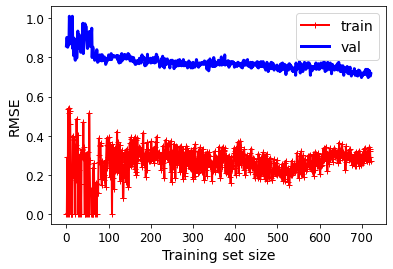

In [154]:
plot_learning_curves(voting, X_train, y_train)

In [ ]:
# There is a gap between the curves. This means that the model performs significantly
# better on the training data than on the validation data (overfitting)

# If we had more data, we could try to feed the model with more training data,
# until the validation error reaches the training error

In [156]:
# Finally, we can try a grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svc__C': [0.1, 0.25, 0.5, 0.75, 1],
    'rnd_forest__max_depth': [None, 25, 50, 75, 100],
    'rnd_forest__n_estimators': [75, 100, 125],
}

grid = GridSearchCV(estimator=voting, param_grid=param_grid, cv=3, verbose=2)

In [157]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=75, svc__C=0.1; total time=   0.3s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=75, svc__C=0.1; total time=   0.3s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=75, svc__C=0.1; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=75, svc__C=0.25; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=75, svc__C=0.25; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=75, svc__C=0.25; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=75, svc__C=0.5; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=75, svc__C=0.5; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=75, svc__C=0.5; total time=   0.3s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=

[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=125, svc__C=0.75; total time=   0.5s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=125, svc__C=0.75; total time=   0.4s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=125, svc__C=1; total time=   0.3s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=125, svc__C=1; total time=   0.3s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=125, svc__C=1; total time=   0.3s
[CV] END rnd_forest__max_depth=50, rnd_forest__n_estimators=75, svc__C=0.1; total time=   0.3s
[CV] END rnd_forest__max_depth=50, rnd_forest__n_estimators=75, svc__C=0.1; total time=   0.2s
[CV] END rnd_forest__max_depth=50, rnd_forest__n_estimators=75, svc__C=0.1; total time=   0.2s
[CV] END rnd_forest__max_depth=50, rnd_forest__n_estimators=75, svc__C=0.25; total time=   0.2s
[CV] END rnd_forest__max_depth=50, rnd_forest__n_estimators=75, svc__C=0.25; total time=   0.2s
[CV] END rnd_forest__max_depth=50, rnd_forest__

[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=125, svc__C=0.5; total time=   0.3s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=125, svc__C=0.5; total time=   0.3s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=125, svc__C=0.5; total time=   0.3s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=125, svc__C=0.75; total time=   0.3s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=125, svc__C=0.75; total time=   0.3s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=125, svc__C=0.75; total time=   0.4s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=125, svc__C=1; total time=   0.4s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=125, svc__C=1; total time=   0.4s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=125, svc__C=1; total time=   0.3s
[CV] END rnd_forest__max_depth=100, rnd_forest__n_estimators=75, svc__C=0.1; total time=   0.2s
[CV] END rnd_forest__max_depth=100, rnd_for

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('rnd_forest',
                                                     RandomForestClassifier()),
                                                    ('svc',
                                                     SVC(probability=True))],
                                        voting='soft'),
             param_grid={'rnd_forest__max_depth': [None, 25, 50, 75, 100],
                         'rnd_forest__n_estimators': [75, 100, 125],
                         'svc__C': [0.1, 0.25, 0.5, 0.75, 1]},
             verbose=2)

In [158]:
grid.best_params_

{'rnd_forest__max_depth': 50, 'rnd_forest__n_estimators': 125, 'svc__C': 0.1}

In [159]:
grid.best_estimator_

VotingClassifier(estimators=[('rnd_forest',
                              RandomForestClassifier(max_depth=50,
                                                     n_estimators=125)),
                             ('svc', SVC(C=0.1, probability=True))],
                 voting='soft')

In [160]:
mod = grid.best_estimator_

In [163]:
# `C` and `n_estimators` are on limits
# Let's modify the `param_grid` to see if the those
# hyperparameters extend their range 

param_grid = {
    'svc__C': [0.001, 0.01, 0.1, 0.25],
    'rnd_forest__max_depth': [None, 25, 50, 75, 100],
    'rnd_forest__n_estimators': [100, 125, 150, 175],
}

grid = GridSearchCV(estimator=voting, param_grid=param_grid, cv=3, verbose=2)

In [164]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=100, svc__C=0.001; total time=   0.3s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=100, svc__C=0.001; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=100, svc__C=0.001; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=100, svc__C=0.01; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=100, svc__C=0.01; total time=   0.2s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=100, svc__C=0.01; total time=   0.3s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=100, svc__C=0.1; total time=   0.3s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=100, svc__C=0.1; total time=   0.3s
[CV] END rnd_forest__max_depth=None, rnd_forest__n_estimators=100, svc__C=0.1; total time=   0.3s
[CV] END rnd_forest__max_depth=None, rnd_forest

[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=150, svc__C=0.25; total time=   0.3s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=175, svc__C=0.001; total time=   0.4s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=175, svc__C=0.001; total time=   0.4s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=175, svc__C=0.001; total time=   0.4s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=175, svc__C=0.01; total time=   0.4s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=175, svc__C=0.01; total time=   0.4s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=175, svc__C=0.01; total time=   0.4s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=175, svc__C=0.1; total time=   0.4s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=175, svc__C=0.1; total time=   0.4s
[CV] END rnd_forest__max_depth=25, rnd_forest__n_estimators=175, svc__C=0.1; total time=   0.4s
[CV] END rnd_forest__max_depth

[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.001; total time=   0.4s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.001; total time=   0.4s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.001; total time=   0.4s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.01; total time=   0.5s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.01; total time=   0.4s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.01; total time=   0.3s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.1; total time=   0.3s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.1; total time=   0.3s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.1; total time=   0.3s
[CV] END rnd_forest__max_depth=75, rnd_forest__n_estimators=150, svc__C=0.25; total time=   0.3s
[CV] END rnd_forest__max_depth

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('rnd_forest',
                                                     RandomForestClassifier()),
                                                    ('svc',
                                                     SVC(probability=True))],
                                        voting='soft'),
             param_grid={'rnd_forest__max_depth': [None, 25, 50, 75, 100],
                         'rnd_forest__n_estimators': [100, 125, 150, 175],
                         'svc__C': [0.001, 0.01, 0.1, 0.25]},
             verbose=2)

In [165]:
grid.best_params_

{'rnd_forest__max_depth': 25, 'rnd_forest__n_estimators': 100, 'svc__C': 0.25}

In [166]:
grid.best_estimator_

VotingClassifier(estimators=[('rnd_forest',
                              RandomForestClassifier(max_depth=25)),
                             ('svc', SVC(C=0.25, probability=True))],
                 voting='soft')

In [167]:
get_acc(grid.best_estimator_, X_train, y_train, X_test, y_test)

0.6550218340611353

In [169]:
# No improvement. Maybe, we can obtain better results using a Neural Network
model = grid.best_estimator_
model

VotingClassifier(estimators=[('rnd_forest',
                              RandomForestClassifier(max_depth=25)),
                             ('svc', SVC(C=0.25, probability=True))],
                 voting='soft')